## UPISATI IME I PREZIME!
# 4. LABORATORIJSKA VJEŽBA - MJERENJE VOĐENIH SMETNJI
---
U ovoj laboratorijskoj vježbi mjerit će se vođene smetnje prekidačkog napajanja prema prikazanoj shemi. U prvom koraku izmjerit će se smetnje napajanja bez filtra, dok će se u drugom koraku analizirati utjecaj filtra.

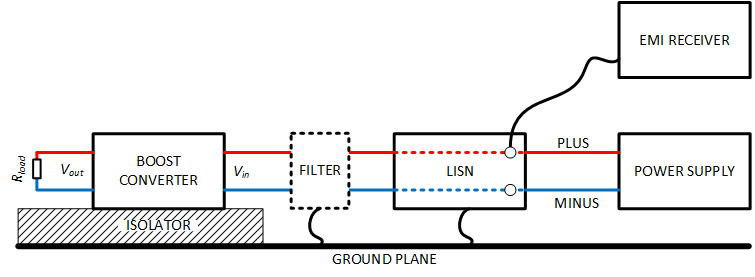

# PRIPREMA
---
1. Proučiti princip rada LISN-a. Znati objasniti razliku u mjerenju na različitim vodovima s obizirom na smjer $I_{DM}$ i $I_{CM}$ struje.
2. Proučiti princip rada mrežnog filtra.
3. Proučiti princip mjerenja vođenih smetnji strujnom sondom.

## EMI prijamnik

U ovoj vježbi će se EMI prijamnik koristiti u _Receiver Mode_ načinu rada radi veće brzine mjerenja. Mjerenja će se izvoditi izravnim uzorkovanjem u vremenskoj domeni (engl. _time domain scan_)<br>
<code><b>MODE</b>->Receiver</code>
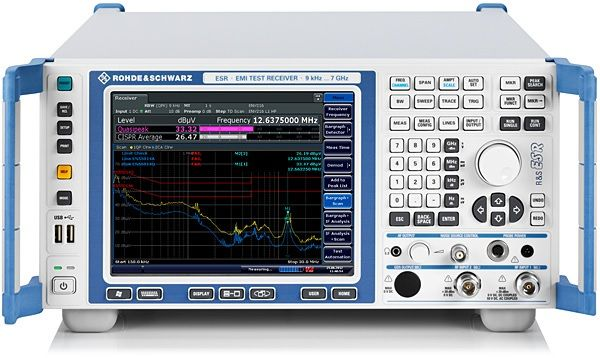

U nastavku su dane granice vođenih smetnji prema CISPR22 standardu za različite klase uređaja i različite detektore EMI prijamnika. Te granice će se koristiti za usporedbu s provedenim mjerenjima.

In [8]:
def conducted_EMI_limits(type):
    # class A (AVG detector) [dBuV], Class A is designated for use in the commercial, business, and industrial environments
    if type == 'classA_AVG':    
        freq_temp = np.linspace(0.15e6, 0.5e6, num=100)
        mag_limit = []
        for i in range(len(freq_temp)):
            mag_limit.append(66)
        freq_limit = freq_temp
    
        freq_temp = np.linspace(0.5e6, 30e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(60)    
     
        freq_limit = np.concatenate((freq_limit, freq_temp))  
        label_limit = 'CISPR22 (mains):class A,AVG'
        return mag_limit, freq_limit, label_limit
    
    # class B (AVG detector) [dBuV], Class B is labeled for use in the residential space (PC, calcultator, etc.)
    # class B devices are more likely to be located close to radio and TV receivers in the home environment.
    elif type == 'classB_AVG':        
        freq_temp = np.linspace(0.15e6, 0.5e6, num=100)
        mag_limit = []
        for i in range(len(freq_temp)):
            #mag_limit.append((189.2 -25.13*np.log10(freq_temp[i])))
            mag_limit.append((155-19.12*np.log10(freq_temp[i])))
        freq_limit = freq_temp
    
        freq_temp = np.linspace(0.5e6, 5e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(46)    
        freq_limit = np.concatenate((freq_limit, freq_temp))
    
        freq_temp = np.linspace(5e6, 30e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(50)          
            
        freq_limit = np.concatenate((freq_limit, freq_temp))
        label_limit = 'CISPR22 (mains):class B,AVG'
        return mag_limit, freq_limit, label_limit
    
    # class A (QP detector) [dBuV]
    elif type == 'classA_QP': 
        freq_temp = np.linspace(0.15e6, 0.5e6, num=100)
        mag_limit = []
        for i in range(len(freq_temp)):
            mag_limit.append(79)
        freq_limit = freq_temp
    
        freq_temp = np.linspace(0.5e6, 30e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(73)    
        
        freq_limit = np.concatenate((freq_limit, freq_temp))  
        label_limit = 'CISPR22 (mains):class A,QP'
        return mag_limit, freq_limit, label_limit

    # class B (QP detector) [dBuV]
    elif type == 'classB_QP': 
        freq_temp = np.linspace(0.15e6, 0.5e6, num=100)
        mag_limit = []
        for i in range(len(freq_temp)):
            #mag_limit.append((199.2 -25.13*np.log10(freq_limit[i])))
            mag_limit.append((165 - 19.12*np.log10(freq_temp[i])))
        freq_limit = freq_temp
    
        freq_temp = np.linspace(0.5e6, 5e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(56)    
        freq_limit = np.concatenate((freq_limit, freq_temp))
    
        freq_temp = np.linspace(5e6, 30e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(60)          
        
        freq_limit = np.concatenate((freq_limit, freq_temp))
        label_limit = 'CISPR22 (mains):class B,QP'
        return mag_limit, freq_limit, label_limit

## Laboratorijski izvor E3646A

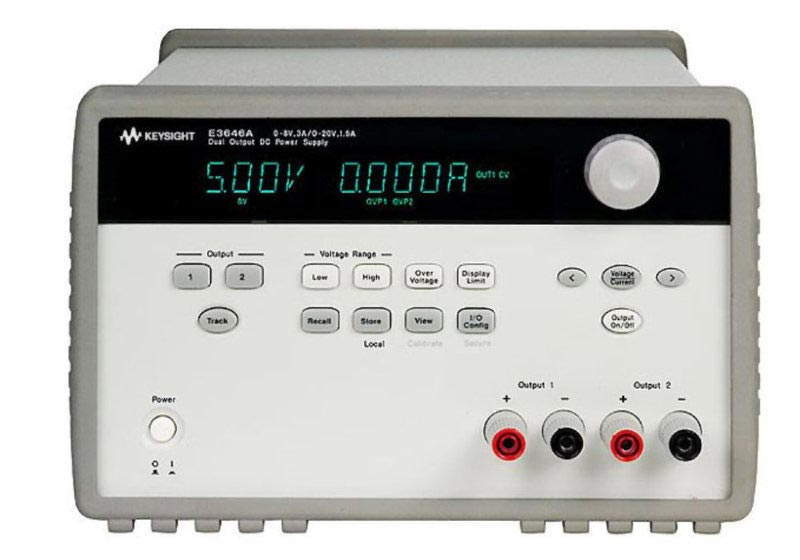

## LISN (eng. _Line Impedance Stabilization Network_)
U ovoj vježbi koristi se LISN koji se bazira na 50 uH zavojnici. U kućištu LISN-a nalaze se dvije mreže kako je prikazano na slici. Izlaz prema EMI prijamniku koji se ne koristi potrebno je zaključiti s 50 Ohma.

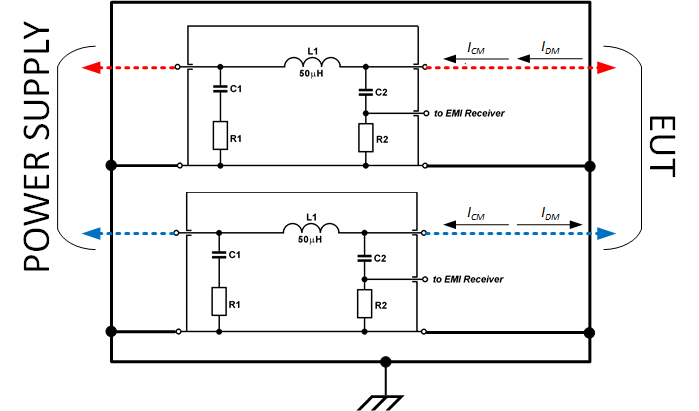

## Strujna sonda MP-50
Strujna sonda je prikazana slikom.
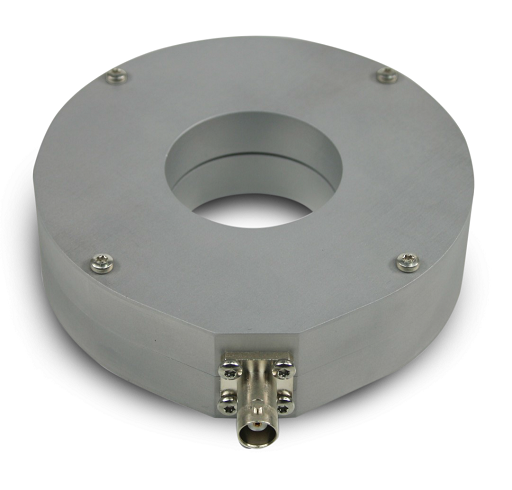

Njezina prijenosna impedancija $Z$ dana je mjerenjem prikazanim slikom. Struja $I$ koja teče kroz sondu na određenoj frekvenciji može se izračunati pomoću mjerenja napona $U$ izvedenog s EMI prijamnikom,<br>
**I [dBuA] = U [dBuV] - Z [dB$\Omega$].**


## Mrežni filtar
U drugom dijelu vježbe koristit će se mrežni filtar prikazan na slici.

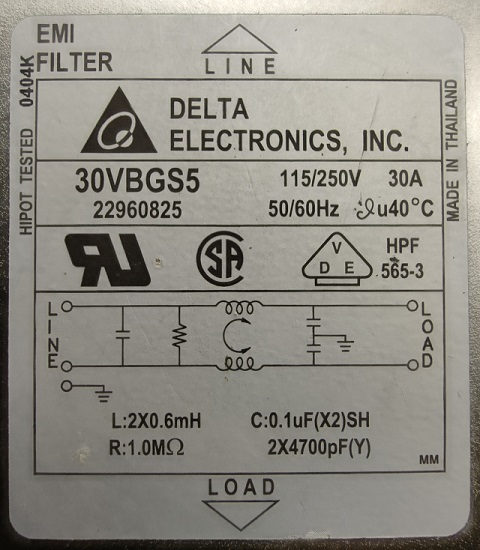

## UZLAZNI DC/DC PRETVARAČ (eng. _boost DC/DC converter_)
U ovoj laboatorijskoj vježbi mjere se vođene smetnje uzlaznog pretvarača baziranog na [TPS61088] (https://www.ti.com/lit/gpn/tps61088). Osnovne karakteristike ovog pretvarača:
- ulazni napon: 2,7 V - 12 V
- izlazni napon: 4,5 V to 12,6 V
- prekidačka struja 10 A
- učinkovitost do 91%
- prekidačka frekvencija: 200 kHz - 2,2 MHz

Cjelovita shema sklopa prikazana je na sljedećoj slici
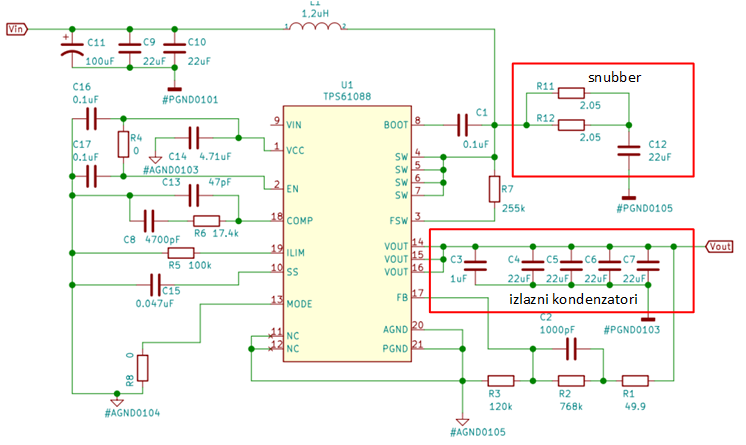

# RAD U LABORATORIJU
---
<b>VAŽNO!</b> Prije početka rada s instrumentom potrebno je staviti uzemljenu narukvicu. Provjerite je li narukvica ispravno spojena na uzemljenje. 

1. Na matičnu ploču spojiti prekidačko napajanje s oznakom zadanoj prema tablici. **Obratiti pažnju na orijentaciju naljepnice**. Postavite matičnu ploču zajedno s prekidačkim napajanjem na izolacijsku podlogu od stiropora.
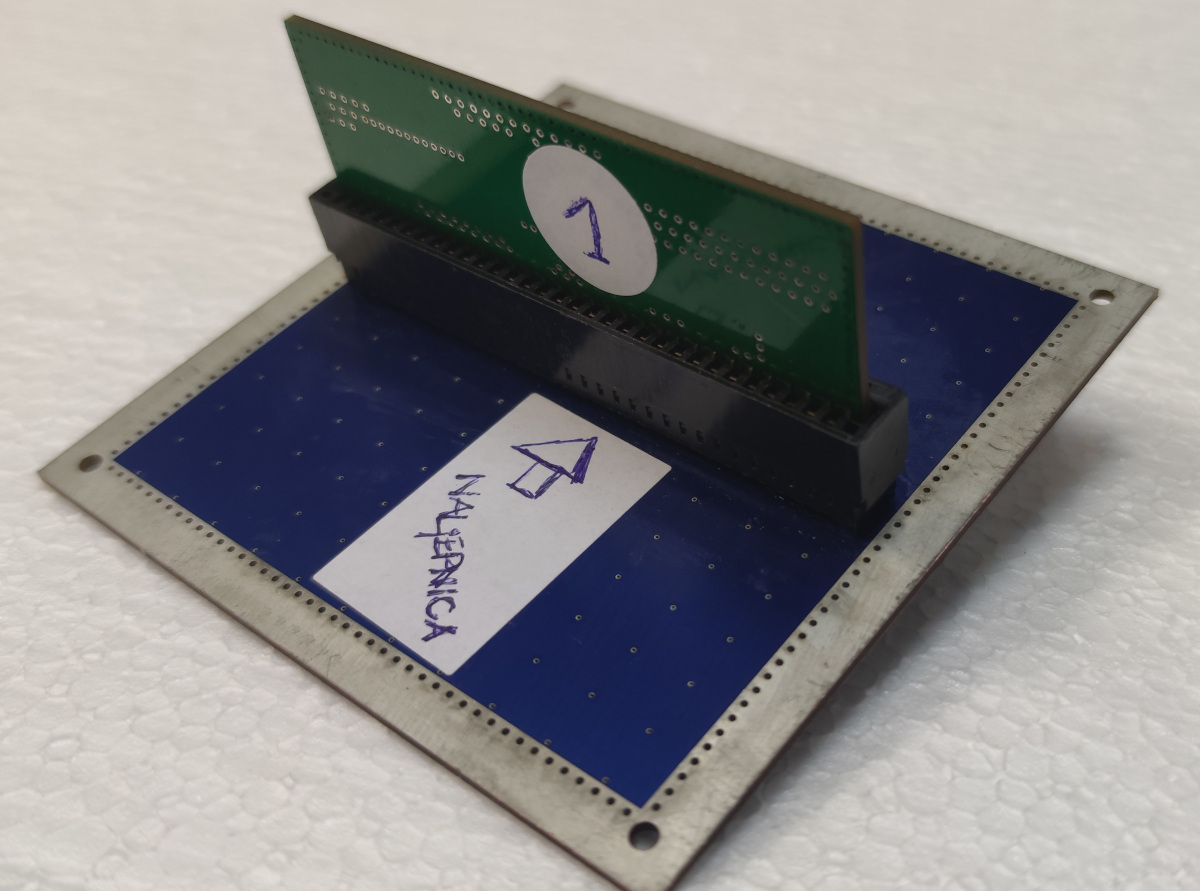


2. Spojiti izlaz prekidačkog napajanja na otpornik zadan prema tablici. Da bi ostvarili zadani iznos koristite kleme odgovarajuću kombinaciju raspoloživih otpornika, a ulaz prekidačkog napajanja na LISN stranu označenu s EUT (**crvena buksna se treba uključiti u utičnicu za mrežno napajanje s oznakom +, a crna buksna se treba uključiti u utičnicu za mrežno napajanje s oznakom -**). U ovom koraku se ne koristi mrežni filtar.

3. Spojiti 1. izlaz (Output 1) laboratorijskog izvora na ulaz LISN-a. Uzemljenje nije potrebno spojiti. 
4. <font color='red'>**Odspojiti EMI prijamnik od LISN-a**</font>. Uključiti EMI prijaminik. 

5. Uključiti laboratorijski izvor i podesiti ulazni napon prekidačkog napajanja na iznos <font color='red'>**5 V**</font> i ograničiti ulaznu struju na <font color='red'>**500 mA**</font>. Za podešavanje točnih vrijednosti koristiti kotačić za podešavanje.
><code> <b>Output</b>->1</code> <br> 
><code> <b>Display Limit</b>->**Voltage**/Current->5 V</code> <br> 
><code> <b>Display Limit</b>->Voltage/**Current**->500 mA</code> <br>

6. Uključiti izlaz laboratorijskog izvora (da bi se napon pojavio na 1. izlazu potrebno ga je uključiti).
><code> <b>Output On/Off</b></code> <br>

**Provjerite s univerzalnim instrumentom napon na izlaznom otporniku. On bi trebao iznositi ~9 V.** Izračunajte izlaznu snagu na otporniku. Uz pretpostavku da prekidačko napajanje radi s 100% učinkovitosti, uz ulazni napon 5 V izračunajte ulaznu struju i usporedite ju sa strujom prikazanom na laboratorijskom izvoru.
<br>
<br>
<br>
<br>

7. Podesiti sljedeće parametre EMI prijamnika
><code> <b>MODE</b>->Receiver</code> <br> 
><code> <b>MEAS</b>->Test Automation->Overview->Current</code> <br> 
><code> <b>MEAS</b>->Test Automation->Scan Table->Time Domain Scan->ON</code> <br> 
><code> <b>FREQ</b>->Stepsize->Auto Fine</code> <br>
><code> <b>AMPT</b>->Unit->dBuV</code> <br>
><code> <b>AMPT</b>->Grid Min Level->0 dBuV</code> <br>
><code> <b>AMPT</b>->Grid Range->100 dBuV</code> <br>
><code> <b>AMPT</b>->RF Atten Manual->40 dB</code> <br>
><code> <b>SWEEP</b>->Freq Axis->Log</code> <br>
><code> <b>FREQ</b>->Start Frequency->150 kHz</code> <br>
><code> <b>FREQ</b>->Stop Frequency->30 MHz</code> <br>

8. Spojiti izlaz LISN-a koji odgovara pozitivnom vodu napajanja na EMI prijamnik. Drugi izlaz LISN-a zaključiti s impedancijom iznosa 50 $\Omega$.

10. Postaviti RBW na 9 kHz
><code> <b>BW</b>->Res BW Manual->9 kHz</code> <br>

11. Za Trace 1 postaviti način prikaza na _Max Hold_ i odabrati _CISPR Average_ detektor.
><code> <b>TRACE</b>->Trace 1->Max Hold</code> <br>
><code> <b>TRACE</b>->Trace 1->Scan Detector->CISPR AV</code> <br>

12. <b>Pokrenuti mjerenje i pričekati da završi</b> <br>
><code> <b>RUN SINGLE</b></code> <br>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

14. Pohraniti mjereni frekvencijski spektar vođenih smetnji na **pozitivnom vodu** napajanja.

In [ ]:
filename1='meas1.DAT'
data = pd.read_csv(filename1, delimiter=';',skiprows=23,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x1 = data['freq'].drop([0]).astype('float')/1e6
y1 = data['dB'].drop([0]).astype('float')
label1 = 'mjerenje (+)'

15. Spojiti izlaz LISN-a koji odgovara negativnom vodu napajanja na EMI prijamnik. Drugi izlaz LISN-a zaključiti s impedancijom iznosa 50 $\Omega$.

16. Pokrenuti mjerenje.
><code> <b>RUN SINGLE</b></code> <br>

17. <b>Pričekati da mjerenje završi</b> <br>
18. Pohraniti mjereni frekvencijski spektar vođenih smetnji na **negativnom vodu** napajanja.

In [67]:
filename2='meas2.DAT'
data = pd.read_csv(filename2, delimiter=';',skiprows=23,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x2 = data['freq'].drop([0]).astype('float')/1e6
y2 = data['dB'].drop([0]).astype('float')
label2 = 'mjerenje (-)'

19. Prikazati oba mjerenja i usporediti ih s dozvoljenim granicama vođenih smetnji za klasu B prema CISPR 22 standardu.

In [ ]:
# učitavanje granica
mag, freq, label = conducted_EMI_limits('classB_AVG')

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca() 
axes.set_xscale("log")
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [MHz]')    
plt.title('Slika 1.')
plt.ylabel('Napon [dBuV]')
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
axes.plot(x1,y1, linestyle='-',label=label1, color=cycle[1], linewidth=3) 
axes.plot(x2,y2, linestyle='-',label=label2, color=cycle[2], linewidth=3) 
axes.plot(freq/1e6,mag, linestyle=':',label=label, linewidth=3, color='r')
leg = axes.legend()

20. Na kojoj frekvenciji radi prekidačko napajanje? Koliki je maksimalni iznos smetnji? Koja je smetnja dominantna? 
<br>
<br>
<br>
<br>

21. <font color='red'>**Odspojiti EMI prijamnik od LISN-a i spojiti na strujnu sondu**</font>. Prekidačko napajanje se i dalje može napajati preko LISN-a ali se on u ovom dijelu neće koristiti za mjerenje. Zaključiti oba mjerna izlaze LISN-a s impedancijom iznosa 50 $\Omega$.
22. Izmjeriti strujnom sondom diferencijske smetnje. Za diferencijske smetnje potrebno je jedan napajački vod okrenuti kroz strujnu sondu tako da diferencijske struje teku u istom smjeru. Na taj način mjeri se dvostruka amplituda diferencijskih smetnji i mjerenje treba umanjiti za 6 dB. Pokušajte vodove postaviti da prolaze sredinom strujne sonde.
23. Podesiti parametre EMI prijamnika da se istakne smetnja.
><code> <b>AMPT</b>->10 dB Min->Off dB</code> <br>
><code> <b>AMPT</b>->Ref Level->? dBuV</code> <br>
><code> <b>AMPT</b>->RF Atten Manual->? dB</code> <br>

In [69]:
filename10='meas10.DAT'
data = pd.read_csv(filename10, delimiter=';',skiprows=23,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x10 = data['freq'].drop([0]).astype('float')/1e6
y10 = data['dB'].drop([0]).astype('float')
label10 = 'diff. smetnje'

24. Izmjeriti strujnom sondom zajedničke smetnje. Zajedničke smetnje kroz oba voda napajanja teku u istom smjeru.

In [70]:
filename11='meas11.DAT'
data = pd.read_csv(filename11, delimiter=';',skiprows=23,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x11 = data['freq'].drop([0]).astype('float')/1e6
y11 = data['dB'].drop([0]).astype('float')
label11 = 'zaj. smetnje'

25. Usporediti mjerenja i zaključiti koja je smetnja dominantna. Koliki je iznos struje diferencijske smetnje, a koliki zajedničke smetnje na frekvenciji na kojoj radi prekidačko napajanje?
<br>
<br>
<br>
<br>

In [ ]:
# učitavanje granica
mag, freq, label = conducted_EMI_limits('classB_AVG')

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca() 
axes.set_xscale("log")
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [MHz]')    
plt.title('Slika 2.')
plt.ylabel('Napon [dBuV]')
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
axes.plot(x10,y10, linestyle='-',label=label10, color=cycle[1], linewidth=3) 
axes.plot(x11,y11, linestyle='-',label=label11, color=cycle[2], linewidth=3) 
axes.plot(freq/1e6,mag, linestyle=':',label=label, linewidth=3, color='r')
leg = axes.legend()

26. Odspojiti EMI prijamnik od strujne sonde
27. Isključiti izlaz laboratorijskog izvora
><code> <b>Output On/Off</b></code> <br>
28. Spojiti mrežni filtar na ulaz prekidačkog napajanja. <font color='red'>**Obratiti pažnju na orijentaciju utičnice**, **Ostvarite dobar spoj filtra s plohom uzemljenja**, **Probajte zadržati istu poziciju matične ploče i kabela kao i u prethodnim mjerenjima**</font> 
29. Uključiti izlaz laboratorijskog izvora (da bi se napon pojavio na 1. izlazu potrebno ga je uključiti).
><code> <b>Output On/Off</b></code> <br>

**Provjerite s univerzalnim instrumentom napon na izlaznom otporniku. On bi trebao iznositi ~9 V.**

30. Vratiti parametre atenuatora EMI prijamnika na inicijalne postavke
><code> <b>AMPT</b>->RF Atten Manual->40 dB</code> <br>
31. Spojiti izlaz LISN-a koji odgovara pozitivnom vodu napajanja na EMI prijamnik. Drugi izlaz LISN-a zaključiti s impedancijom iznosa 50 $\Omega$.
32. Pokrenuti mjerenje za Trace 1.
><code> <b>RUN SINGLE</b></code> <br>

33. <b>Pričekati da mjerenje završi</b> <br>
34. Pohraniti mjereni frekvencijski spektar vođenih smetnji na **pozitivnom vodu** napajanja.

In [72]:
# učitavanje frekvencijskog spektra EMI prijamnika
filename3='meas3.DAT'
data = pd.read_csv(filename3, delimiter=';',skiprows=23,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x3 = data['freq'].drop([0]).astype('float')/1e6
y3 = data['dB'].drop([0]).astype('float')
label3 = 'mjerenje (+)+filtar'

35. Prikazati mjerenja na pozitivnom vodu napajanja s i bez filtra i usporediti ih s dozvoljenim granicama vođenih smetnji za klasu B prema CISPR 22 standardu.

In [ ]:
# učitavanje granica
mag, freq, label = conducted_EMI_limits('classB_AVG')

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca() 
axes.set_xscale("log")
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [MHz]')    
plt.title('Slika 3.')
plt.ylabel('Napon [dBuV]')
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
axes.plot(x1,y1, linestyle='-',label=label1, color=cycle[1], linewidth=3) 
axes.plot(x3,y3, linestyle='-',label=label3, color=cycle[2], linewidth=3) 
axes.plot(freq/1e6,mag, linestyle=':',label=label, linewidth=3, color='r')
leg = axes.legend()

36. Objasniti dobivene rezultate.
<br>
<br>
<br>
<br>